In [1]:
import pandas as pd

#dataset = pd.read_excel('C:/Users/Stavros/Desktop/3. +27/plus_27_Last_7.xlsx')
dataset = pd.read_excel('C:/Users/Stavros/Desktop/3. +27/plus_27_Last_7.xlsx')

In [2]:
index_list = []

nba_teams = dataset['teamAbbr'].unique()
seasons = dataset['seasonID'].unique()

for team in nba_teams:
    for season in seasons:
        df_team = dataset.loc[((dataset['teamAbbr'] == team) | (dataset['opptAbbr'] == team)) & (dataset['seasonID'] == season)]
        rows = df_team.index
        rows = list(rows)
        index_list.append(rows[:10])
        #index_list.append(rows[-10:])
        
flat_index_list = [item for sublist in index_list for item in sublist]
flat_index_list = list(set(flat_index_list))
dataset.drop(flat_index_list,inplace=True)
#dataframe1.drop(dataframe1.index[flat_index_list], axis=0, inplace=True)

In [3]:
# Reading Dataset saved earlier
df1 = dataset

In [4]:
df1 = df1.drop(columns = ['gmDate','teamConf','teamDiv','opptConf','opptDiv'])

In [5]:
df1 = df1.drop(columns = ['Unnamed: 0'])

In [6]:
df1.head()

,teamAbbr,teamRslt,teamDayOff,opptAbbr,opptDayOff,seasonID,oppt2P%_cum_mean,opptAway2P%_cum_mean,oppt2PA_cum_mean,opptAway2PA_cum_mean,...,teamRestingDays,opptRestingDays,teamWin%_Last7,teamHomeWin%_Last7,opptWin%_Last7,opptAwayWin%_Last7,teamHomeAvgPtDiff_Last7,opptAwayAvgPtDiff_Last7,teamAvgPtDiff_Last7,opptAvgPtDiff_Last7
136,PHO,0,1,MIA,2,2012-2013,0.51346,0.485117,57.7,57.166667,...,1,1,0.428571,0.0,0.714286,0.0,0.0,0.0,-5.285714,6.285714
142,DET,1,2,BOS,1,2012-2013,0.50172,0.497320,62.6,61.800000,...,2,3,0.142857,0.0,0.714286,0.0,0.0,0.0,-3.857143,4.000000
150,DAL,0,2,GS,1,2012-2013,0.48786,0.485117,64.1,65.166667,...,1,1,0.428571,0.0,0.428571,0.0,0.0,0.0,-3.285714,-2.857143
151,UTA,1,2,HOU,1,2012-2013,0.48624,0.507400,56.5,58.200000,...,1,1,0.571429,0.0,0.285714,0.0,0.0,0.0,0.714286,-1.714286
152,PHI,1,2,TOR,2,2012-2013,0.43629,0.442340,62.7,57.000000,...,0,1,0.714286,0.0,0.285714,0.0,0.0,0.0,2.428571,-6.714286


In [7]:
df1.columns.to_list()

['teamAbbr',
 'teamRslt',
 'teamDayOff',
 'opptAbbr',
 'opptDayOff',
 'seasonID',
 'oppt2P%_cum_mean',
 'opptAway2P%_cum_mean',
 'oppt2PA_cum_mean',
 'opptAway2PA_cum_mean',
 'oppt2PM_cum_mean',
 'opptAway2PM_cum_mean',
 'oppt3P%_cum_mean',
 'opptAway3P%_cum_mean',
 'oppt3PA_cum_mean',
 'opptAway3PA_cum_mean',
 'oppt3PM_cum_mean',
 'opptAway3PM_cum_mean',
 'opptAR_cum_mean',
 'opptAwayAR_cum_mean',
 'opptASST%_cum_mean',
 'opptAwayASST%_cum_mean',
 'opptAST_cum_mean',
 'opptAwayAST_cum_mean',
 'opptAST/TO_cum_mean',
 'opptAwayAST/TO_cum_mean',
 'opptBLK_cum_mean',
 'opptAwayBLK_cum_mean',
 'opptBLK%_cum_mean',
 'opptAwayBLK%_cum_mean',
 'opptBLKR_cum_mean',
 'opptAwayBLKR_cum_mean',
 'opptDRB_cum_mean',
 'opptAwayDRB_cum_mean',
 'opptDREB%_cum_mean',
 'opptAwayDREB%_cum_mean',
 'opptDrtg_cum_mean',
 'opptAwayDrtg_cum_mean',
 'opptEDiff_cum_mean',
 'opptAwayEDiff_cum_mean',
 'opptEFG%_cum_mean',
 'opptAwayEFG%_cum_mean',
 'opptFG%_cum_mean',
 'opptAwayFG%_cum_mean',
 'opptFGA_cum_mean',

In [8]:
df1.dtypes.unique()

array([dtype('O'), dtype('int64'), dtype('float64')], dtype=object)

In [9]:
df1.shape

(6440, 425)

In [10]:
from sklearn.preprocessing import OneHotEncoder
df2 = df1.copy()
df2 = df2[['teamAbbr']]
df3 = df1.copy()
df3 = df3[['opptAbbr']]
df4 = df1.copy()
df4 = df4[['seasonID']]
y2 = pd.get_dummies(df2.teamAbbr, prefix='teamAbbr')
y3 = pd.get_dummies(df3.opptAbbr, prefix='opptAbbr')
y4 = pd.get_dummies(df4.seasonID, prefix='seasonID')

In [11]:
y2.head()

,teamAbbr_ATL,teamAbbr_BKN,teamAbbr_BOS,teamAbbr_CHA,teamAbbr_CHI,teamAbbr_CLE,teamAbbr_DAL,teamAbbr_DEN,teamAbbr_DET,teamAbbr_GS,...,teamAbbr_OKC,teamAbbr_ORL,teamAbbr_PHI,teamAbbr_PHO,teamAbbr_POR,teamAbbr_SA,teamAbbr_SAC,teamAbbr_TOR,teamAbbr_UTA,teamAbbr_WAS
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [12]:
y3.head()

,opptAbbr_ATL,opptAbbr_BKN,opptAbbr_BOS,opptAbbr_CHA,opptAbbr_CHI,opptAbbr_CLE,opptAbbr_DAL,opptAbbr_DEN,opptAbbr_DET,opptAbbr_GS,...,opptAbbr_OKC,opptAbbr_ORL,opptAbbr_PHI,opptAbbr_PHO,opptAbbr_POR,opptAbbr_SA,opptAbbr_SAC,opptAbbr_TOR,opptAbbr_UTA,opptAbbr_WAS
136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
150,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
y4.head()

,seasonID_2012-2013,seasonID_2013-2014,seasonID_2014-2015,seasonID_2015-2016,seasonID_2016-2017,seasonID_2017-2018
136,1,0,0,0,0,0
142,1,0,0,0,0,0
150,1,0,0,0,0,0
151,1,0,0,0,0,0
152,1,0,0,0,0,0


In [14]:
df_new = pd.merge(df1, y2, left_index=True, right_index=True)

In [15]:
df_new = pd.merge(df_new, y3, left_index=True, right_index=True)

In [16]:
df_new = pd.merge(df_new, y4, left_index=True, right_index=True)

In [17]:
df_new.head()

,teamAbbr,teamRslt,teamDayOff,opptAbbr,opptDayOff,seasonID,oppt2P%_cum_mean,opptAway2P%_cum_mean,oppt2PA_cum_mean,opptAway2PA_cum_mean,...,opptAbbr_SAC,opptAbbr_TOR,opptAbbr_UTA,opptAbbr_WAS,seasonID_2012-2013,seasonID_2013-2014,seasonID_2014-2015,seasonID_2015-2016,seasonID_2016-2017,seasonID_2017-2018
136,PHO,0,1,MIA,2,2012-2013,0.51346,0.485117,57.7,57.166667,...,0,0,0,0,1,0,0,0,0,0
142,DET,1,2,BOS,1,2012-2013,0.50172,0.497320,62.6,61.800000,...,0,0,0,0,1,0,0,0,0,0
150,DAL,0,2,GS,1,2012-2013,0.48786,0.485117,64.1,65.166667,...,0,0,0,0,1,0,0,0,0,0
151,UTA,1,2,HOU,1,2012-2013,0.48624,0.507400,56.5,58.200000,...,0,0,0,0,1,0,0,0,0,0
152,PHI,1,2,TOR,2,2012-2013,0.43629,0.442340,62.7,57.000000,...,0,1,0,0,1,0,0,0,0,0


In [18]:
df_new = df_new.drop(columns = ['teamAbbr','opptAbbr','seasonID'])

In [19]:
df_new.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('uint8')], dtype=object)

In [20]:
# df_new.columns.to_list()

In [21]:
df_new.shape

(6440, 488)

In [22]:
df_new.head()

,teamRslt,teamDayOff,opptDayOff,oppt2P%_cum_mean,opptAway2P%_cum_mean,oppt2PA_cum_mean,opptAway2PA_cum_mean,oppt2PM_cum_mean,opptAway2PM_cum_mean,oppt3P%_cum_mean,...,opptAbbr_SAC,opptAbbr_TOR,opptAbbr_UTA,opptAbbr_WAS,seasonID_2012-2013,seasonID_2013-2014,seasonID_2014-2015,seasonID_2015-2016,seasonID_2016-2017,seasonID_2017-2018
136,0,1,2,0.51346,0.485117,57.7,57.166667,29.6,27.666667,0.42148,...,0,0,0,0,1,0,0,0,0,0
142,1,2,1,0.50172,0.497320,62.6,61.800000,31.4,30.800000,0.37666,...,0,0,0,0,1,0,0,0,0,0
150,0,2,1,0.48786,0.485117,64.1,65.166667,31.2,31.833333,0.29712,...,0,0,0,0,1,0,0,0,0,0
151,1,2,1,0.48624,0.507400,56.5,58.200000,27.4,29.600000,0.32003,...,0,0,0,0,1,0,0,0,0,0
152,1,2,2,0.43629,0.442340,62.7,57.000000,27.5,25.200000,0.37259,...,0,1,0,0,1,0,0,0,0,0


In [23]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
from pandas import read_csv

import numpy as np
from numpy import mean

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras import optimizers
from keras import regularizers

import pickle

import warnings
warnings.filterwarnings('ignore')

C:\Users\Stavros\AppData\Local\Temp\ipykernel_19432\3654505832.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [24]:
import tensorflow as tf 

# Learning rate
learning_rate = 0.001

# Epoch  
epochs = 300

# Batch size
batch_size = 32

# Optimizer
opt = tf.optimizers.Adam(lr=learning_rate)

In [25]:
# Sequential Model

# model = Sequential()
# model.add(Dropout(0.2, input_shape=(487,)))
# model.add(Dense(400, activation='relu', input_dim = 487))
# model.add(Dropout(0.2, input_shape=(400,)))
# model.add(Dense(370, activation='relu'))
# model.add(Dropout(0.2, input_shape=(370,)))
# model.add(Dense(340, activation='relu'))
# model.add(Dropout(0.2, input_shape=(340,)))
# model.add(Dense(300, activation='relu'))
# model.add(Dropout(0.2, input_shape=(300,)))
# model.add(Dense(270, activation='relu'))
# model.add(Dropout(0.2, input_shape=(270,)))
# model.add(Dense(240, activation='relu'))
# model.add(Dropout(0.2, input_shape=(240,)))
# model.add(Dense(200, activation='relu'))
# model.add(Dropout(0.2, input_shape=(200,)))
# model.add(Dense(165, activation='relu'))
# model.add(Dropout(0.2, input_shape=(165,)))
# model.add(Dense(120, activation='relu'))
# model.add(Dropout(0.2, input_shape=(120,)))
# model.add(Dense(90, activation='relu'))
# model.add(Dropout(0.2, input_shape=(90,)))
# model.add(Dense(65, activation='relu'))
# model.add(Dropout(0.2, input_shape=(65,)))
# model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.2, input_shape=(30,)))
# model.add(Dense(15, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [26]:
# Complie the model

# model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])

In [72]:
# label = df_new['teamRslt']
# # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
# data = df_new.drop(columns = ['teamRslt'])
# scaler = MinMaxScaler()
# scaler = scaler.fit(data)
# normalized_data = pd.DataFrame(scaler.transform(data))

# # Train Test Split 
# x_train, x_test, y_train, y_test = train_test_split(normalized_data, label, test_size=0.068, random_state=2)

# # Splitting 500 Rows for Validation Data
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.068, random_state=2)
# #x_val = x_train[-500:]
# #y_val = y_train[-500:]
# #x_train = x_train[:-500]
# #y_train = y_train[:-500]

# print(x_train.shape)
# print(y_train.shape)
# print(x_val.shape)
# print(y_val.shape)

In [28]:
seasons = ["seasonID_2012-2013","seasonID_2013-2014","seasonID_2014-2015","seasonID_2015-2016","seasonID_2016-2017","seasonID_2017-2018"]
for test_season in seasons:
    seasons1 = seasons.copy()
    seasons1.remove(test_season)
    for val_season in seasons1:
        
        df_new1 = df_new.loc[df_new[val_season]==1]
        df_new2 = df_new.loc[df_new[test_season]==1]
        df_new3 = df_new.loc[(df_new[val_season]!=1) & (df_new[test_season]!=1)]
        
        label1 = df_new1['teamRslt']
        # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
        data1 = df_new1.drop(columns = ['teamRslt'])
        scaler1 = MinMaxScaler()
        scaler1 = scaler1.fit(data1)
        normalized_data1 = pd.DataFrame(scaler1.transform(data1))

        label2 = df_new2['teamRslt']
        # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
        data2 = df_new2.drop(columns = ['teamRslt'])
        scaler2 = MinMaxScaler()
        scaler2 = scaler2.fit(data2)
        normalized_data2 = pd.DataFrame(scaler2.transform(data2))

        label3 = df_new3['teamRslt']
        # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
        data3 = df_new3.drop(columns = ['teamRslt'])
        scaler3 = MinMaxScaler()
        scaler3 = scaler3.fit(data3)
        normalized_data3 = pd.DataFrame(scaler3.transform(data3))

        x_test = normalized_data2
        y_test = label2

        x_val = normalized_data1
        y_val = label1

        x_train = normalized_data3
        y_train = label3
        
        model = Sequential()
        model.add(Dropout(0.2, input_shape=(487,)))
        model.add(Dense(400, activation='relu', input_dim = 487))
        model.add(Dropout(0.2, input_shape=(400,)))
        model.add(Dense(370, activation='relu'))
        model.add(Dropout(0.2, input_shape=(370,)))
        model.add(Dense(340, activation='relu'))
        model.add(Dropout(0.2, input_shape=(340,)))
        model.add(Dense(300, activation='relu'))
        model.add(Dropout(0.2, input_shape=(300,)))
        model.add(Dense(270, activation='relu'))
        model.add(Dropout(0.2, input_shape=(270,)))
        model.add(Dense(240, activation='relu'))
        model.add(Dropout(0.2, input_shape=(240,)))
        model.add(Dense(200, activation='relu'))
        model.add(Dropout(0.2, input_shape=(200,)))
        model.add(Dense(165, activation='relu'))
        model.add(Dropout(0.2, input_shape=(165,)))
        model.add(Dense(120, activation='relu'))
        model.add(Dropout(0.2, input_shape=(120,)))
        model.add(Dense(90, activation='relu'))
        model.add(Dropout(0.2, input_shape=(90,)))
        model.add(Dense(65, activation='relu'))
        model.add(Dropout(0.2, input_shape=(65,)))
        model.add(Dense(30, activation='relu'))
        model.add(Dropout(0.2, input_shape=(30,)))
        model.add(Dense(15, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        
        model.compile(loss='BinaryCrossentropy', optimizer=opt, metrics=['accuracy'])
        
        history = model.fit(
            x_train,
            y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(x_val, y_val),
            verbose = 0
        )
        
        print("test season {}".format(test_season))
        print("val season {}".format(val_season))

        aa = history.history.get('val_accuracy')[-1]
        print('Accuracy on Validation data: %.2f' % (aa*100))
        
        score, accuracy = model.evaluate(x_test, y_test)
        print('Accuracy on Testing data: %.2f' % (accuracy*100))
        

test season seasonID_2012-2013
val season seasonID_2013-2014
Accuracy on Validation data: 62.94
34/34 [==============================] - 0s 1ms/step - loss: 0.6307 - accuracy: 0.6595
Accuracy on Testing data: 65.95
test season seasonID_2012-2013
val season seasonID_2014-2015
Accuracy on Validation data: 68.56
34/34 [==============================] - 0s 1ms/step - loss: 0.6050 - accuracy: 0.6754
Accuracy on Testing data: 67.54
test season seasonID_2012-2013
val season seasonID_2015-2016
Accuracy on Validation data: 59.37
34/34 [==============================] - 0s 1ms/step - loss: 0.6697 - accuracy: 0.6138
Accuracy on Testing data: 61.38
test season seasonID_2012-2013
val season seasonID_2016-2017
Accuracy on Validation data: 58.38
34/34 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6138
Accuracy on Testing data: 61.38
test season seasonID_2012-2013
val season seasonID_2017-2018
Accuracy on Validation data: 64.00
34/34 [==============================] - 0s 

In [39]:
# val_season = "seasonID_2016-2017"
# test_season = "seasonID_2017-2018"

# df_new1 = df_new.loc[df_new[val_season]==1]
# df_new2 = df_new.loc[df_new[test_season]==1]
# df_new3 = df_new.loc[(df_new[val_season]!=1) & (df_new[test_season]!=1)]


# label1 = df_new1['teamRslt']
# # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
# data1 = df_new1.drop(columns = ['teamRslt'])
# scaler1 = MinMaxScaler()
# scaler1 = scaler1.fit(data1)
# normalized_data1 = pd.DataFrame(scaler1.transform(data1))

# label2 = df_new2['teamRslt']
# # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
# data2 = df_new2.drop(columns = ['teamRslt'])
# scaler2 = MinMaxScaler()
# scaler2 = scaler2.fit(data2)
# normalized_data2 = pd.DataFrame(scaler2.transform(data2))

# label3 = df_new3['teamRslt']
# # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
# data3 = df_new3.drop(columns = ['teamRslt'])
# scaler3 = MinMaxScaler()
# scaler3 = scaler3.fit(data3)
# normalized_data3 = pd.DataFrame(scaler3.transform(data3))

# x_test = normalized_data2
# y_test = label2

# x_val = normalized_data1
# y_val = label1

# x_train = normalized_data3
# y_train = label3

# # df_new1 = df_new.loc[df_new["seasonID_2017-2018"]==1]
# # df_new2 = df_new.loc[df_new["seasonID_2017-2018"]!=1]

# # label1 = df_new1['teamRslt']
# # # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
# # data1 = df_new1.drop(columns = ['teamRslt'])
# # scaler1 = MinMaxScaler()
# # scaler1 = scaler1.fit(data1)
# # normalized_data1 = pd.DataFrame(scaler1.transform(data1))

# # label2 = df_new2['teamRslt']
# # # data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
# # data2 = df_new2.drop(columns = ['teamRslt'])
# # scaler2 = MinMaxScaler()
# # scaler2 = scaler2.fit(data2)
# # normalized_data2 = pd.DataFrame(scaler2.transform(data2))

# # x_unseen = normalized_data1
# # y_unseen = label1

# # #x_train, x_val, y_train, y_val = train_test_split(normalized_data2, label2, test_size=0.068, random_state=2)

# # # Train Test Split 
# # x_train, x_test, y_train, y_test = train_test_split(normalized_data2, label2, test_size=0.068, random_state=2)

# # # Splitting 500 Rows for Validation Data
# # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.068, random_state=2)
# # #x_val = x_train[-500:]


In [40]:
# model.summary()

In [28]:
# # Model Training

# history = model.fit(
#     x_train,
#     y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     validation_data=(x_val, y_val),
#     verbose = 0
# )

In [44]:
# a = history.history.get('accuracy')[-1]
# print('Accuracy on Training data: %.2f' % (a*100))

In [41]:
# aa = history.history.get('val_accuracy')[-1]
# print('Accuracy on Validation data: %.2f' % (aa*100))

In [42]:
# plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
# plt.plot(history.history['val_accuracy'], 'c-',  label='val_accuracy' )
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'Valid'], loc='upper right')
# plt.show

In [43]:
# score, accuracy = model.evaluate(x_test, y_test)
# print('Accuracy on Testing data: %.2f' % (accuracy*100))

In [34]:
# score, accuracy = model.evaluate(x_unseen, y_unseen)
# print('Accuracy on unseen data: %.2f' % (accuracy*100))

# TCN

In [38]:
from tcn import TCN
from keras.models import Input, Model

batch_size, timesteps, input_dim = None, 487, 1

x_train_new = x_train.to_numpy().reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_new = x_test.to_numpy().reshape(x_test.shape[0], x_test.shape[1], 1)
x_val_new = x_val.to_numpy().reshape(x_val.shape[0], x_val.shape[1], 1)

i = Input(batch_shape=(batch_size, timesteps, input_dim))

o = TCN(return_sequences=False)(i)  # The TCN layers are here.
o = Dense(1)(o)

m = Model(inputs=[i], outputs=[o])
m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = m.fit(x_train_new, y_train, epochs=10, validation_data=(x_val_new, y_val))

Epoch 1/10
135/135 [==============================] - 17s 115ms/step - loss: 6.2763 - accuracy: 0.5882 - val_loss: 6.3468 - val_accuracy: 0.5838
Epoch 2/10
135/135 [==============================] - 15s 110ms/step - loss: 6.2760 - accuracy: 0.5884 - val_loss: 6.3468 - val_accuracy: 0.5838
Epoch 3/10
135/135 [==============================] - 14s 107ms/step - loss: 6.2760 - accuracy: 0.5884 - val_loss: 6.3468 - val_accuracy: 0.5838
Epoch 4/10
135/135 [==============================] - 15s 113ms/step - loss: 6.2760 - accuracy: 0.5884 - val_loss: 6.3468 - val_accuracy: 0.5838
Epoch 5/10
135/135 [==============================] - 15s 110ms/step - loss: 6.2760 - accuracy: 0.5884 - val_loss: 6.3468 - val_accuracy: 0.5838
Epoch 6/10
135/135 [==============================] - 15s 112ms/step - loss: 6.2760 - accuracy: 0.5884 - val_loss: 6.3468 - val_accuracy: 0.5838
Epoch 7/10
135/135 [==============================] - 14s 107ms/step - loss: 6.2760 - accuracy: 0.5884 - val_loss: 6.3468 - val_ac

# LSTM

In [54]:
df_new1 = df_new.loc[df_new["seasonID_2016-2017"]==1]
df_new2 = df_new.loc[df_new["seasonID_2017-2018"]==1]
df_new3 = df_new.loc[(df_new["seasonID_2016-2017"]!=1) & (df_new["seasonID_2017-2018"]!=1)]


label1 = df_new1['teamRslt']
# data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
data1 = df_new1.drop(columns = ['teamRslt'])
scaler1 = MinMaxScaler()
scaler1 = scaler1.fit(data1)
normalized_data1 = pd.DataFrame(scaler1.transform(data1))

label2 = df_new2['teamRslt']
# data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
data2 = df_new2.drop(columns = ['teamRslt'])
scaler2 = MinMaxScaler()
scaler2 = scaler2.fit(data2)
normalized_data2 = pd.DataFrame(scaler2.transform(data2))

label3 = df_new3['teamRslt']
# data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])
data3 = df_new3.drop(columns = ['teamRslt'])
scaler3 = MinMaxScaler()
scaler3 = scaler3.fit(data3)
normalized_data3 = pd.DataFrame(scaler3.transform(data3))

x_test = normalized_data2
y_test = label2

x_val = normalized_data1
y_val = label1

x_train = normalized_data3
y_train = label3

In [55]:
arr_X_train = x_train.to_numpy()
arr_X_train = arr_X_train.reshape(arr_X_train.shape[0], arr_X_train.shape[1], 1)

arr_X_val = x_val.to_numpy()
arr_X_val = arr_X_val.reshape(arr_X_val.shape[0], arr_X_val.shape[1], 1)

arr_X_test = x_test.to_numpy()
arr_X_test = arr_X_test.reshape(arr_X_test.shape[0], arr_X_test.shape[1], 1)

In [58]:
model = Sequential()
model.add(LSTM(50, activation='tanh', recurrent_dropout=0.2, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu', recurrent_dropout=0.2, return_sequences=True))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [59]:
model.fit(arr_X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
140/140 [==============================] - 77s 523ms/step - loss: 0.6798 - accuracy: 0.5884
Epoch 2/10
140/140 [==============================] - 73s 524ms/step - loss: 0.6785 - accuracy: 0.5888
Epoch 3/10
140/140 [==============================] - 74s 529ms/step - loss: 0.6786 - accuracy: 0.5888
Epoch 4/10
140/140 [==============================] - 74s 531ms/step - loss: 0.6781 - accuracy: 0.5888
Epoch 5/10
140/140 [==============================] - 75s 533ms/step - loss: 0.6777 - accuracy: 0.5888
Epoch 6/10
140/140 [==============================] - 75s 533ms/step - loss: 0.6781 - accuracy: 0.5888
Epoch 7/10
140/140 [==============================] - 75s 534ms/step - loss: 0.6777 - accuracy: 0.5888
Epoch 8/10
140/140 [==============================] - 75s 533ms/step - loss: 0.6778 - accuracy: 0.5888
Epoch 9/10
140/140 [==============================] - 75s 535ms/step - loss: 0.6777 - accuracy: 0.5888
Epoch 10/10
140/140 [==============================] - 75s 534ms/step - l

In [ ]:
# evaluate the keras model
scores = model.evaluate(arr_X_val, y_val, verbose=0)
print('Accuracy: %.2f' % (scores[1]*100))

In [ ]:
# evaluate the keras model
scores = model.evaluate(arr_X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (scores[1]*100))

In [196]:
def create_model(input_length):
    print ('Creating model...')
    model = Sequential()
    #model.add(Embedding(input_dim = 188, output_dim = 50, input_length = input_length))
    model.add(LSTM(256, activation='sigmoid', return_sequences=True))
    #model.add(Dropout(0.5))
    #model.add(LSTM(256, activation='sigmoid'))
    #model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    print ('Compiling...')
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [197]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 64, 256)           6235136   
_________________________________________________________________
dense_93 (Dense)             (None, 64, 1)             257       
Total params: 6,235,393
Trainable params: 6,235,393
Non-trainable params: 0
_________________________________________________________________


In [198]:
model = create_model(len(x_train[0]))

Creating model...
Compiling...


In [199]:
print ('Fitting model...')
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_val, y_val), verbose = 1)

Fitting model...
Epoch 1/2


ValueError: in user code:

    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Stavros\.conda\envs\thesis\lib\site-packages\keras\engine\input_spec.py:214 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_40 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 487)


In [111]:
a = history.history.get('accuracy')[-1]
print('Accuracy on Training data: %.2f' % (a*100))

Accuracy on Training data: 57.67


<function matplotlib.pyplot.show(close=None, block=None)>

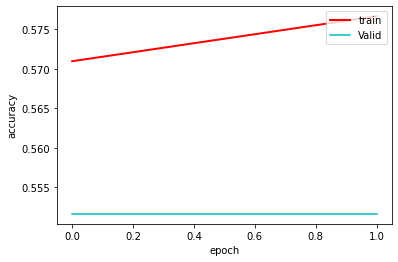

In [112]:
plt.plot(history.history['accuracy'], 'r-', label = 'accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], 'c-',  label='val_accuracy' )
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Valid'], loc='upper right')
plt.show

In [113]:
score, acc = model.evaluate(x_test, y_test, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

457/457 [==============================] - 9s 19ms/step - loss: 0.6603 - accuracy: 0.6346
Test score: 0.6603099703788757
Test accuracy: 0.6345732808113098


In [ ]:
from keras import models
from keras.layers import Dense, Dropout
# from keras.utils import to_categorical
from keras.datasets import mnist
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG

import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

# NUM_ROWS = 28
# NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#label = dataframe2["teamRslt"]
#data = dataframe2[dataframe2.columns.difference(["teamRslt"])]

label = df_new['teamRslt']
data = df_new.drop(columns = ['teamRslt','Unnamed: 0'])

# scaler = StandardScaler()
# scaler.fit(data)
# data = scaler.transform(data)

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.05, random_state=1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [ ]:
# # Reshape data
# X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
# X_train = X_train.astype('float32') / 255
# X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
# X_test = X_test.astype('float32') / 255

# # Categorically encode labels
# y_train = to_categorical(y_train, NUM_CLASSES)
# y_test = to_categorical(y_test, NUM_CLASSES)

# # Check state of dataset
# data_summary(X_train, y_train, X_test, y_test)

In [ ]:
# Learning rate
learning_rate = 0.0001

# Epoch  
EPOCHS = 50

# Batch size
BATCH_SIZE = 32

In [ ]:
# Build neural network
model = models.Sequential()
model.add(Dense(100, activation='relu', input_dim = 198))
# model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(1, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          callbacks=[plot_losses],
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.summary()

In [ ]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))